# Workshop5. Линейная регрессия. (33 балла)

> Линейная регрессия - это не повод для затяжной депрессии.

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

### Полезная литература

- [Лекция в рамках проекта deeplay[lab] про линейные модели А.Н.Шевляков](https://youtu.be/n9I5BBBZmRU)
- [Учебник ML от ШАД — линейные модели](https://ml-handbook.ru/chapters/linear_models/intro)
- Заметки из курса [Машинное обучение на ФКН ВШЭ](https://github.com/esokolov/ml-course-hse)
  - [лекция 1](99-extra__ml-course-hse__lecture02-linregr.pdf)
  - [лекция 2](99-extra__ml-course-hse__lecture03-linregr.pdf)
  - [лекция 3](99-extra__ml-course-hse__lecture04-linregr.pdf)
- [Статья про лин.рег. от ODS на habrahabr](https://habr.com/ru/company/ods/blog/323890/)

## Данные

Возьмем датасет о стоимости домов: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data.

Он лежит в `./data/house_prices.csv.gz`

```
SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
MSSubClass: The building class
MSZoning: The general zoning classification
LotFrontage: Linear feet of street connected to property
LotArea: Lot size in square feet
Street: Type of road access
Alley: Type of alley access
LotShape: General shape of property
LandContour: Flatness of the property
Utilities: Type of utilities available
LotConfig: Lot configuration
LandSlope: Slope of property
Neighborhood: Physical locations within Ames city limits
Condition1: Proximity to main road or railroad
Condition2: Proximity to main road or railroad (if a second is present)
BldgType: Type of dwelling
HouseStyle: Style of dwelling
OverallQual: Overall material and finish quality
OverallCond: Overall condition rating
YearBuilt: Original construction date
YearRemodAdd: Remodel date
RoofStyle: Type of roof
RoofMatl: Roof material
Exterior1st: Exterior covering on house
Exterior2nd: Exterior covering on house (if more than one material)
MasVnrType: Masonry veneer type
MasVnrArea: Masonry veneer area in square feet
ExterQual: Exterior material quality
ExterCond: Present condition of the material on the exterior
Foundation: Type of foundation
BsmtQual: Height of the basement
BsmtCond: General condition of the basement
BsmtExposure: Walkout or garden level basement walls
BsmtFinType1: Quality of basement finished area
BsmtFinSF1: Type 1 finished square feet
BsmtFinType2: Quality of second finished area (if present)
BsmtFinSF2: Type 2 finished square feet
BsmtUnfSF: Unfinished square feet of basement area
TotalBsmtSF: Total square feet of basement area
Heating: Type of heating
HeatingQC: Heating quality and condition
CentralAir: Central air conditioning
Electrical: Electrical system
1stFlrSF: First Floor square feet
2ndFlrSF: Second floor square feet
LowQualFinSF: Low quality finished square feet (all floors)
GrLivArea: Above grade (ground) living area square feet
BsmtFullBath: Basement full bathrooms
BsmtHalfBath: Basement half bathrooms
FullBath: Full bathrooms above grade
HalfBath: Half baths above grade
Bedroom: Number of bedrooms above basement level
Kitchen: Number of kitchens
KitchenQual: Kitchen quality
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
Functional: Home functionality rating
Fireplaces: Number of fireplaces
FireplaceQu: Fireplace quality
GarageType: Garage location
GarageYrBlt: Year garage was built
GarageFinish: Interior finish of the garage
GarageCars: Size of garage in car capacity
GarageArea: Size of garage in square feet
GarageQual: Garage quality
GarageCond: Garage condition
PavedDrive: Paved driveway
WoodDeckSF: Wood deck area in square feet
OpenPorchSF: Open porch area in square feet
EnclosedPorch: Enclosed porch area in square feet
3SsnPorch: Three season porch area in square feet
ScreenPorch: Screen porch area in square feet
PoolArea: Pool area in square feet
PoolQC: Pool quality
Fence: Fence quality
MiscFeature: Miscellaneous feature not covered in other categories
MiscVal: $Value of miscellaneous feature
MoSold: Month Sold
YrSold: Year Sold
SaleType: Type of sale
SaleCondition: Condition of sale
```

Целевой переменной будет `SalePrice`. То есть мы будем предсказывать стоимость жилья на основе его характеристик.

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('./data/house_prices.csv.gz', index_col='Id')
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
assert df.shape == (1460, 80)

In [ ]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

## 1.0 Анализ целевого признака (3 балла)

Удостоверимся, что раcпределение целевого признака "хорошее", без странных выбросов. В идеале мы хотим видеть нормальное распределени или достаточно похожее на него, без очень длинных "хвостов" выбросов.

_Почему требуется нормальность распределения: ищите объяснения линейной регресси через алгоритмы максимизации правдоподобия. В итоге, грубо говоря, суть сводится к тому, что с ростом объема выборки, оценка максимального правдоподобия лучше описывает нормальное распределение._

[Коэффициент эксцесса](http://www.machinelearning.ru/wiki/index.php?title=%D0%9A%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82_%D1%8D%D0%BA%D1%81%D1%86%D0%B5%D1%81%D1%81%D0%B0) показывает степень остроты пика распределения случайной величины. Для нормального распределения он равен `0`. Если хвосты распределения «тяжелее», а пик более «приплюснутый», чем у нормального распределения, то коэффициент < 0. А если хвосты легкие, то больше 0. В нашем случае должно получиться околов `6.5`.

Задание:
- Нарисуйте график распределения `SalePrice`, используйте аргумент `fit=scipy.stats.norm`, чтобы нарисовать предполагаемое нормальное распределение. Напечатайте значение коэффициент эксцесса `kurtosis` для этого признака.
- Нарисуйте график [scipy.stats.probplot](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.probplot.html) - он покажет нам реальные квантили выборки и теоретические. По нему можно видеть, на сколько много выьросов и на сколько выборка предсказуема.
- Что вы можете сказать по поводу выборки основываясь на `probplot`.  [wiki](https://en.wikipedia.org/wiki/Normal_probability_plot)

<ipython-input-67-5f1566678165>:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data, fit=norm,bins=50,kde=True,color='red',hist_kws={"linewidth": 15,'alpha':1})


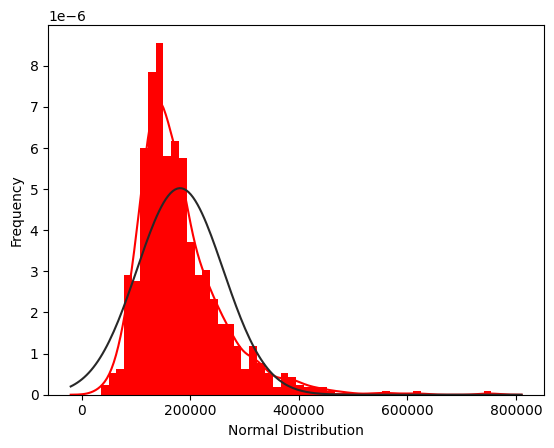

6.509812011089439


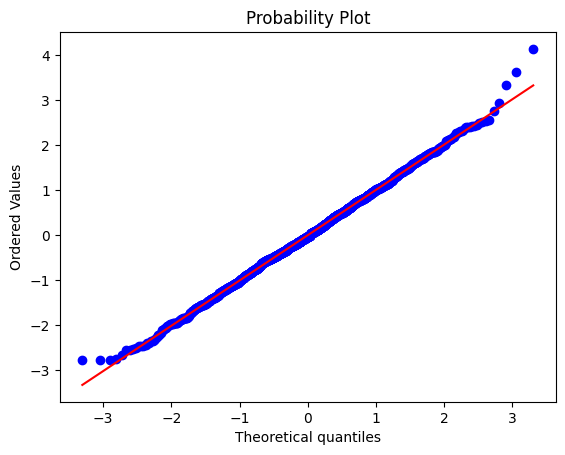

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, kurtosis

%matplotlib inline

df = pd.read_csv('../content/house_prices.csv.gz', index_col='Id')

# https://www.delftstack.com/api/scipy/scipy-scipy.stats.norm-method/
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html
# https://docs.scipy.org/doc/scipy/reference/stats.html

#1 Показываем распределение
data = df['SalePrice']

#norm.pdf(data,loc=0,scale=1) Вычисленные значения нормального распределения N[0,1]

ax = sns.distplot(data, fit=norm,bins=50,kde=True,color='red',hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

plt.show()
print(kurtosis(data))

#2
ax1 = plt.subplot()
x = stats.norm.rvs(loc= 0, scale= 1,size=data.size).ravel()
res = stats.probplot(x, plot=plt)

## 1.2 Анализ некоторых зависимостей (3 балла)

У нас очень много разных признаков. Любопытно построить разные графики. Позаботьтесь о красоте и наглядности графиков, сделайте так, чтобы они были большими и их можно было прочесть. Даже подписи на графиках должны быть читаемые!!

Задания: Постройте графики, отражающие зависимости этих признаков:
- дата постройки дома и его стоимости
- "качество дома и материалов" и его стоимости
- площадь дома и стоимость

Hints: Вспомните про boxplot, jointplot, lmplot...

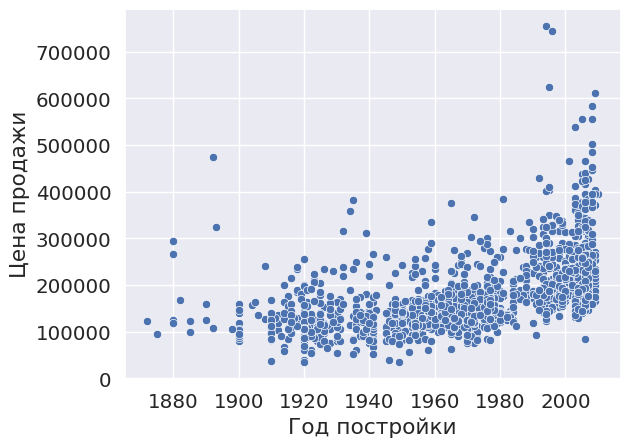

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv('../content/house_prices.csv.gz', index_col='Id')

sns.set(font_scale=1.3)
sns.scatterplot(x='YearBuilt', y='SalePrice', data=df)
plt.xlabel('Год постройки')
plt.ylabel('Цена продажи')
plt.show()

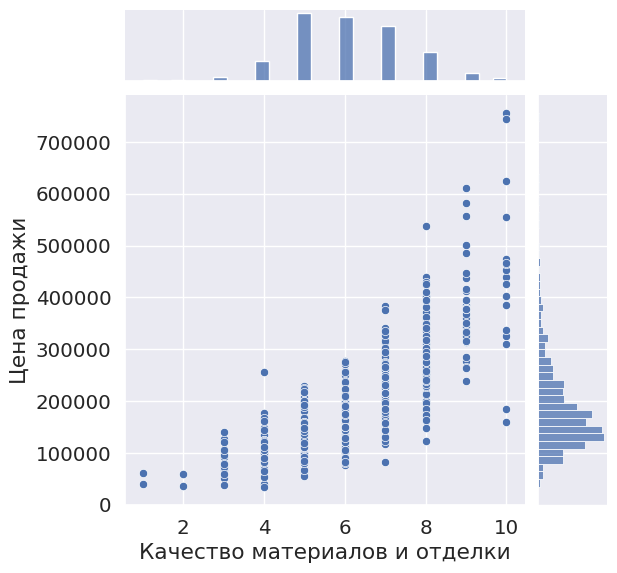

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv('../content/house_prices.csv.gz', index_col='Id')

sns.set(font_scale=1.3)
sns.jointplot(x='OverallQual', y='SalePrice', data=df)
plt.xlabel('Качество материалов и отделки')
plt.ylabel('Цена продажи')
plt.show()

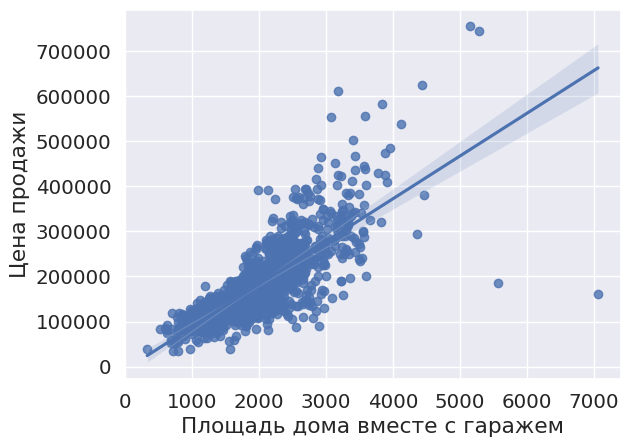

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv('../content/house_prices.csv.gz', index_col='Id')

df['AreaHouse'] = df['1stFlrSF'] + df['2ndFlrSF'] + df['GarageArea']

sns.set(font_scale=1.3)
sns.regplot(x='AreaHouse', y='SalePrice', data=df)
plt.xlabel('Площадь дома вместе с гаражем')
plt.ylabel('Цена продажи')
plt.show()

## 1.2 Heatmap (3 балла)

Судя по предыдущим графикам, есть некоторые линейные зависимости. Но строить по графику на каждый признак из 80 штук немного долго и не наглядно. Постройте красивый график корреляции всех признаков. Используйте цвета `RdYlGn`, так будет нагляднее. Не забудьте применить маску, чтобы убрать дублирующую половину матрицы.

<ipython-input-29-a12a483041a5>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(df.corr()))
<ipython-input-29-a12a483041a5>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df.corr(), mask=mask, cmap="RdYlGn")


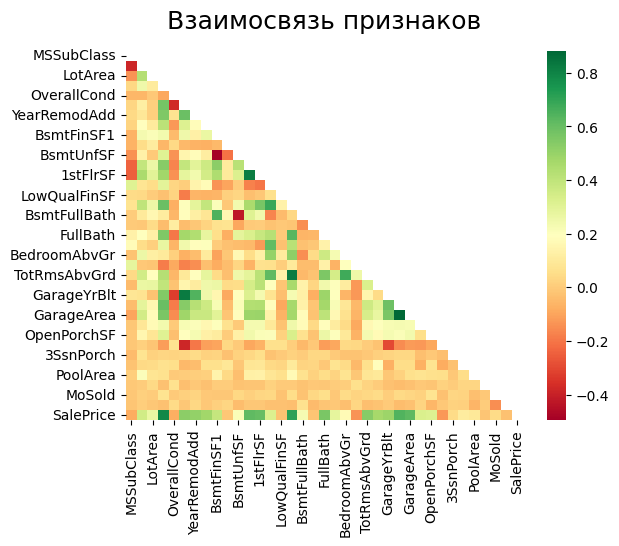

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv('../content/house_prices.csv.gz', index_col='Id')

mask = np.triu(np.ones_like(df.corr()))
heatmap = sns.heatmap(df.corr(), mask=mask, cmap="RdYlGn")
heatmap.set_title('Взаимосвязь признаков', fontdict={'fontsize':18}, pad=16);

Большая матрица 38x38 ячеек. И мы видим, там есть сильно коррелируемые объекты с нашей целевой переменной.

- Нарисуйте крупно heatmap этих сильно коррелируемых объектов( больше 0.5 по абсолютному значению) и сделайте так, чтобы в каждой ячейке было значение корреляции.
- Выведите список этих сильно коррелируемых признаков.
- Желательно сделать heatmap диагональной матрицей, чтобы было красиво (в теории был пример)

Запомним эти признаки!

<ipython-input-161-3af2d6230e19>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr().to_numpy() #Корреляционный массив


OverallQual     YearBuilt     0.5723227689623621
YearBuilt     YearBuilt     0.5506839241941717
YearBuilt     YearRemodAdd     0.5928549763436519
YearRemodAdd     YearBuilt     0.5378084986123907
YearRemodAdd     1stFlrSF     0.5223960519923867
BsmtFinSF1     GrLivArea     0.8195299750050339
TotalBsmtSF     YearBuilt     0.5930074300286512
TotalBsmtSF     BsmtFullBath     0.5660239689357486
TotalBsmtSF     FullBath     0.6875010641666033
1stFlrSF     1stFlrSF     0.6492117535742649
2ndFlrSF     YearBuilt     0.5505997093682543
2ndFlrSF     HalfBath     0.6300116462511148
GrLivArea     FullBath     0.6097073002717436
FullBath     FullBath     0.5029006133459056
FullBath     HalfBath     0.5212695109189948
BedroomAbvGr     FullBath     0.6164226354915431
BedroomAbvGr     HalfBath     0.8254893743088425
BedroomAbvGr     BedroomAbvGr     0.5547842535334836
BedroomAbvGr     TotRmsAbvGrd     0.676619935742649
TotRmsAbvGrd     YearBuilt     0.5477658448351629
TotRmsAbvGrd     YearRemodAdd    

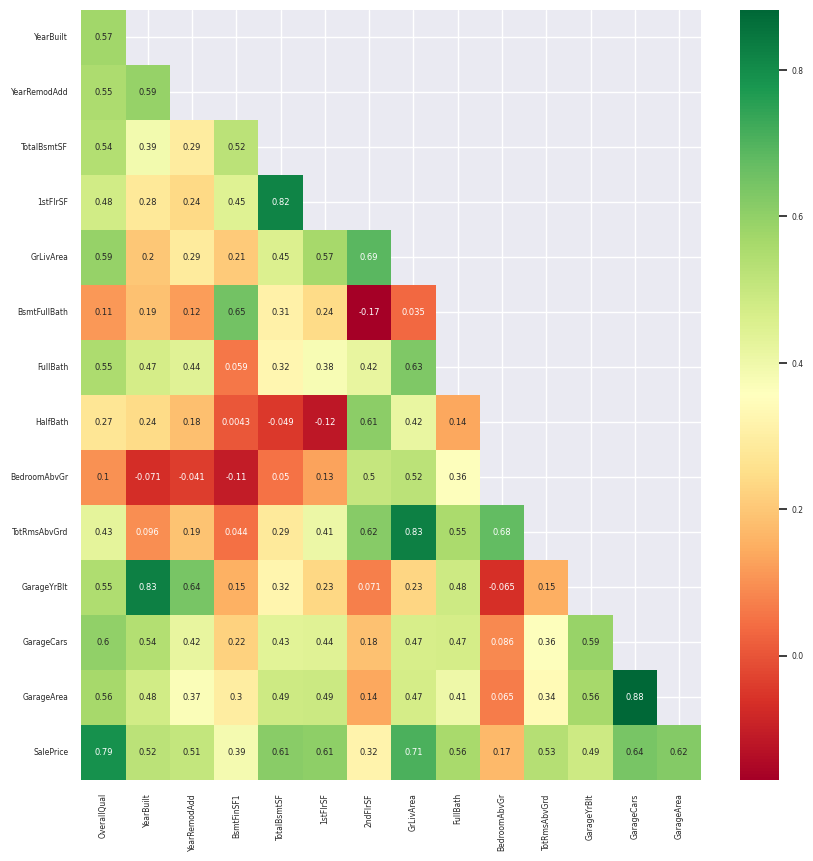

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from copy import copy
df = pd.read_csv('../content/house_prices.csv.gz', index_col='Id')

corr = df.corr().to_numpy() #Корреляционный массив
corr = np.tril(corr,-1) #Зануляет верхний триугольник и диагональ
sns.set(font_scale=0.5)

ind_x, = np.where(np.all( corr<=0.5 , axis=0)) #для x. np.all - тест для всех, если правда при условии то подходит
corr = np.delete(corr, ind_x, 1) #Удаляем неподходящие
map_labels_x = [item for i, item in enumerate( df.select_dtypes(include=np.number).columns.tolist() ) if i not in ind_x] #Обновляем заголовки x

ind_y, = np.where(np.all( corr<=0.5 , axis=1)) # для y
corr = np.delete(corr, ind_y, 0)
map_labels_y = [item for i, item in enumerate( df.select_dtypes(include=np.number).columns.tolist() ) if i not in ind_y] #Обновляем заголовки y

fig, ax = plt.subplots(figsize=(10, 10))
corr[corr == 0] = np.nan # убираем 0 значения, чтобы было красиво триугольником
sns.heatmap(corr,xticklabels=map_labels_x,yticklabels=map_labels_y,cmap="RdYlGn",annot=True)

for i,j in np.transpose(np.nonzero(corr >= 0.5)):
  print(map_labels_x[i],"   ",map_labels_y[j],"   ",corr[i][j])

print("Всего таких признаков: ", len(np.transpose(np.nonzero(corr >= 0.5)) ))

## 1.3 Пропущеные данные (3 балла)

Задание:
 - Посчитайте общее количество пропущенных данных по каждому признаку
 - посчитайте долю пропущенных данных выборки
 - удалите из выборки признаки, доля пропущенных которых больще 10%
 - пропущенные категориальные заполните словом 'unknown' (у них dtype object)
 - пропущенные числовые заполните средним (у них dtype float)

Hinst: https://stackoverflow.com/a/38134049/3205200

Общее количество пропущенных данных по признакам:  
 MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64


Датафрейм в котором доля пропущенных признаков больше 10%: 
       MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
Id                                                                         
1             60       RL     8450   Pave      Reg         Lvl    AllPub   
2             20       RL     9600   Pave      Reg         Lvl    AllPub   
3             60       RL    11250   Pave      IR1         Lvl    AllPub   
4             70       RL     9550   Pave      IR1         Lvl    AllPub   
5             60       RL    14260   Pave      IR1         Lvl    AllPub   
...          ...      ...      ...    ...      ...         ...       ...   
1456          60    

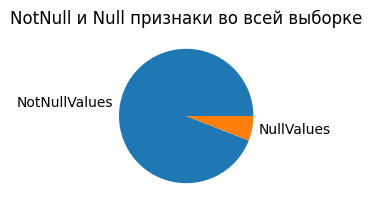

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv('../content/house_prices.csv.gz', index_col='Id')

# 1

print("Общее количество пропущенных данных по признакам: ",'\n',df.isnull().sum())

# 2

fig = plt.figure()
ax1 = fig.add_subplot(221)


notNull_ = df.notnull().sum().sum()
isNull_ = df.isnull().sum().sum()

ax1.pie([ notNull_ , isNull_ ], labels=["NotNullValues","withNullValues"])
ax1.title.set_text('NotNull и Null признаки во всей выборке')

print('\n')

# 3
# df2 т.к. в df после этого пункта не остается пустых призников

dfColumn_10 = df.columns[df.notnull().sum()*0.1 > df.isnull().sum()]
df2 = df[dfColumn_10]
print( "Датафрейм в котором доля пропущенных признаков больше 10%:", '\n', df2 )

print('\n')

# 4

obj_columns = df.select_dtypes(include=['object']).columns
df[obj_columns] = df[obj_columns].fillna('unknown')

flt_columns = df.select_dtypes(include=['float']).columns
df[flt_columns] = df[flt_columns].fillna(df[flt_columns].mean())

print( "Датафрейм в NaN == 'unknown':", '\n', df )

## 1.4 Категориальные переменные (1 балл)

На сколько вы помните, линейная регрессия не умеет обрабатывать категориальные признаки, так как ей нужны ЧИСЛА. Но не беда, в pandas есть встроенная функция [get_dummies](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Задание:
- сконвертируйте все категориальные признаки(dtype=object) в вектора числовых с помощью get_dummies
- напечатайте сколько у вас теперь признаков
- Положите в переменную X все данные из датасета, кроме целевой переменной. Положите в переменную y только целевую переменную.

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv('../content/house_prices.csv.gz', index_col='Id')

#1

df = pd.get_dummies(df, columns= df.select_dtypes(include=['object']).columns, drop_first= True )
df_vec = df.values.tolist() #Дикие лаги, но 100% работает проверял на другом Датафрейме

print("Сконвертированный датафрейм: ",df_vec)
print('\n')

Сконвертированный датафрейм:  [[60.0, 65.0, 8450.0, 7.0, 5.0, 2003.0, 2003.0, 196.0, 706.0, 0.0, 150.0, 856.0, 856.0, 854.0, 0.0, 1710.0, 1.0, 0.0, 2.0, 1.0, 3.0, 1.0, 8.0, 0.0, 2003.0, 2.0, 548.0, 0.0, 61.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 2008.0, 208500.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0

In [51]:
#2
print ("Признаки по типу данных: \n", df.dtypes.value_counts(),"Всего: ", df.dtypes.value_counts().sum(),'\n')

#3
# Насколько я понял целевой признак это тот, что мы пердугадываем. Т.е. он главный, именно его будем предукадывать

y = df.loc[:, df.columns == 'SalePrice']
print("Целевой признак: ",'\n', y)

x = df.loc[:, df.columns != 'SalePrice']
print("Оставшиеся данные из датасета: ",'\n',x)

Признаки по типу данных: 
 object     43
int64      34
float64     3
dtype: int64 Всего:  80 

Целевой признак:  
       SalePrice
Id             
1        208500
2        181500
3        223500
4        140000
5        250000
...         ...
1456     175000
1457     210000
1458     266500
1459     142125
1460     147500

[1460 rows x 1 columns]
Оставшиеся данные из датасета:  
       MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                      
1             60       RL         65.0     8450   Pave   NaN      Reg   
2             20       RL         80.0     9600   Pave   NaN      Reg   
3             60       RL         68.0    11250   Pave   NaN      IR1   
4             70       RL         60.0     9550   Pave   NaN      IR1   
5             60       RL         84.0    14260   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1456          60       RL         

## 1.5 Переобучение (3 балла)

Обучим обычную модель без регуляризации [sklearn.linear_model.LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

- Выведите все коэффициенты для каждого признака, отсортировав по возрастанию по модулю значения коэффициента. Используйте print и for, иначе jupyter схлопнет вывод numpy массива. Можете округлить коэффициенты до 2 знаков после запятой.
- Выведите **среднее** ошибки предсказания на 5 фолдах (cv=5) для этой линейной регрессии с помощью функции [sklearn.model_selection.cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html). Укажите `scoring='neg_mean_squared_error'`, чтобы считалась [MSE](http://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error)

In [35]:
from sklearn.model_selection import train_test_split, cross_val_score
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets, linear_model, metrics
%matplotlib inline
df = pd.read_csv('../content/house_prices.csv.gz', index_col='Id')

##################
obj_columns = df.select_dtypes(include=['object']).columns
df[obj_columns] = df[obj_columns].fillna('unknown')

flt_columns = df.select_dtypes(include=['float']).columns
df[flt_columns] = df[flt_columns].fillna(df[flt_columns].mean())

df = pd.get_dummies(df, columns= df.select_dtypes(include=['object']).columns, drop_first= True )
####################

diabetes = datasets.load_diabetes()
reg = linear_model.LinearRegression()
lasso = linear_model.Lasso()

#Целевой признак
y = df.loc[:, df.columns == 'SalePrice'].values.tolist()

#Оставшиеся данные
x = df.loc[:, df.columns != 'SalePrice'].values.tolist()

#Тренируем модель
reg.fit(x, y)

#Коэффициенты регрессии
rg = reg.coef_
print('Coefficients: ', rg.round(2), '\n' ) #.astype(int)

print('Ошибки предсказания: ',cross_val_score(lasso, x, y, cv=5,scoring='neg_mean_squared_error'))

Coefficients:  [[-5.6240000e+01  4.3000000e+01  7.1000000e-01  6.8130600e+03
   5.7967200e+03  3.1961000e+02  1.0423000e+02  2.0720000e+01
   1.5830000e+01  8.7700000e+00 -1.8100000e+00  2.2790000e+01
   1.8690000e+01  3.6520000e+01 -2.9560000e+01  2.5650000e+01
   1.6208200e+03 -3.9017000e+02  3.6788500e+03  1.8827800e+03
  -3.6608100e+03 -1.3576100e+04  1.7698600e+03  6.2522600e+03
  -1.7670000e+01  3.8922500e+03  1.8340000e+01  1.5120000e+01
   8.6000000e-01  2.9200000e+00  3.3100000e+01  3.5820000e+01
   6.8538000e+02  2.0000000e-02 -4.5946000e+02 -5.6349000e+02
   3.2673180e+04  2.2587410e+04  2.5238970e+04  2.1881810e+04
   3.3165620e+04 -5.1908000e+02 -1.4730400e+03  4.9376000e+03
   5.2957500e+03  1.8123800e+03  7.6004300e+03 -1.1239300e+04
   5.4749300e+03 -3.7124840e+04  8.5802300e+03 -7.3547000e+03
  -1.6937190e+04 -1.2327000e+03  7.3922300e+03 -4.1213040e+04
   8.0737600e+03 -2.0957100e+03 -5.5803600e+03 -1.4517870e+04
  -1.0243380e+04  1.1864810e+04 -2.1450610e+04 -1.13860

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.484e+11, tolerance: 7.592e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.159e+11, tolerance: 7.288e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.002e+11, tolerance: 6.990e

Ошибки предсказания:  [-3.97904239e+09 -1.16147389e+09 -1.50621498e+09 -5.69245914e+08
 -2.21705935e+09]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.372e+11, tolerance: 7.249e+08
  model = cd_fast.enet_coordinate_descent(


К счастью в этот раз коэффициенты при признаках не улетели в космос, но всё равно достигли очень больших значений. Например `RoofStyle_Shed` получился в моем случае около `-514961`. А у некоторых признаков коэффициент уже равен 0, хотя не была применена регуляризация.

## 1.6 Ridge и Lasso (4 балла)

- Обучите Lasso и Ridge для разных значений регуляризации alpha
- нарисуйте график значений коэффициентов модели для каждого признака, как мы делали на практике. По оси X будет значение alpha, по Y - значение коэффициента. на графике будет "радуга" из линий разных цветов(линий столько, сколько признаков).
- Нарисуйте гистограмму, в которой по оси Y будет количество коэффициентов, равных 0 (<0.0001) для Loss регресиии, а по оси X - значение коэффициента альфа.

alpha взять от 1 до 500 с каким-нибудь шагом. Но не переборщите, а то долго будете ждать.

In [7]:
from sklearn.model_selection import train_test_split, cross_val_score
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets, linear_model, metrics
%matplotlib inline
df = pd.read_csv('../content/house_prices.csv.gz', index_col='Id')

##################
obj_columns = df.select_dtypes(include=['object']).columns
df[obj_columns] = df[obj_columns].fillna('unknown')

flt_columns = df.select_dtypes(include=['float']).columns
df[flt_columns] = df[flt_columns].fillna(df[flt_columns].mean())

df = pd.get_dummies(df, columns= df.select_dtypes(include=['object']).columns, drop_first= True )
####################

diabetes = datasets.load_diabetes()
reg = linear_model.LinearRegression()
lasso = linear_model.Lasso()

#Целевой признак
y = df.loc[:, df.columns == 'SalePrice'].values.tolist()

#Оставшиеся данные
x = df.loc[:, df.columns != 'SalePrice'].values.tolist()

#Тренируем модель
reg.fit(x, y)

#Коэффициенты регрессии
rg = reg.coef_
print('Coefficients: ', rg.round(2), '\n' ) #.astype(int)

print('Ошибки предсказания: ',cross_val_score(lasso, x, y, cv=3))

Coefficients:  [[-5.6240000e+01  4.3000000e+01  7.1000000e-01  6.8130600e+03
   5.7967200e+03  3.1961000e+02  1.0423000e+02  2.0720000e+01
   1.5830000e+01  8.7700000e+00 -1.8100000e+00  2.2790000e+01
   1.8690000e+01  3.6520000e+01 -2.9560000e+01  2.5650000e+01
   1.6208200e+03 -3.9017000e+02  3.6788500e+03  1.8827800e+03
  -3.6608100e+03 -1.3576100e+04  1.7698600e+03  6.2522600e+03
  -1.7670000e+01  3.8922500e+03  1.8340000e+01  1.5120000e+01
   8.6000000e-01  2.9200000e+00  3.3100000e+01  3.5820000e+01
   6.8538000e+02  2.0000000e-02 -4.5946000e+02 -5.6349000e+02
   3.2673180e+04  2.2587410e+04  2.5238970e+04  2.1881810e+04
   3.3165620e+04 -5.1908000e+02 -1.4730400e+03  4.9376000e+03
   5.2957500e+03  1.8123800e+03  7.6004300e+03 -1.1239300e+04
   5.4749300e+03 -3.7124840e+04  8.5802300e+03 -7.3547000e+03
  -1.6937190e+04 -1.2327000e+03  7.3922300e+03 -4.1213040e+04
   8.0737600e+03 -2.0957100e+03 -5.5803600e+03 -1.4517870e+04
  -1.0243380e+04  1.1864810e+04 -2.1450610e+04 -1.13860

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.041e+11, tolerance: 6.237e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.561e+11, tolerance: 5.906e+08
  model = cd_fast.enet_coordinate_descent(


Ошибки предсказания:  [0.60236585 0.83153812 0.74208605]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.977e+11, tolerance: 6.270e+08
  model = cd_fast.enet_coordinate_descent(


In [15]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
%matplotlib inline
df = pd.read_csv('../content/house_prices.csv.gz', index_col='Id')

ridge = Ridge()
ridge.fit(x, y)

for coef, col in sorted(zip(ridge.coef_, df.columns), key=lambda x: np.abs(x[0])):
    print("{} \t {}".format(np.round(coef, 4), col))

# plt.figure(figsize=(14,8))
# sns.barplot(y='columns', x='coef',data=pd.DataFrame(list(zip(ridge.coef_, df.columns)), columns=["coef", "columns"]))

[-1.15103400e+02 -1.04177700e+02  5.22600000e-01  8.32192090e+03
  5.13031030e+03  1.92139300e+02  6.96580000e+01  1.91981000e+01
  1.95770000e+00  5.00570000e+00 -2.10330000e+00  4.86010000e+00
  1.27503000e+01  2.84014000e+01 -1.07217000e+01  3.04300000e+01
  5.42209750e+03  8.48531000e+02  6.91830830e+03  2.29657370e+03
 -3.16955960e+03 -1.24600787e+04  2.87962040e+03  4.91901490e+03
 -4.78262000e+01  1.15073761e+04 -1.55510000e+00  1.78897000e+01
  1.88330000e+00  8.41880000e+00  4.42004000e+01  4.32648000e+01
  2.35863200e+02  1.94000000e-02 -3.55331500e+02 -6.00215700e+02
  2.24209277e+04  1.36662461e+04  1.75690994e+04  1.44745391e+04
  2.48865581e+04 -1.21696000e+02 -6.89466500e+02  5.94655150e+03
 -1.61190500e+04  1.16692400e+03  1.55857547e+04  3.71258580e+03
  1.34040697e+04 -2.38457957e+04  9.23582530e+03 -9.37171020e+03
 -1.44452511e+04 -1.70570380e+03  8.18311200e+03 -1.39869185e+04
 -1.23952320e+03  3.63684470e+03 -2.07784430e+03 -8.22286010e+03
 -4.33532420e+03  1.54279

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.176e+11, tolerance: 9.208e+08
  model = cd_fast.enet_coordinate_descent(


-0.0 	 GarageType
-0.2224 	 BsmtFinSF1
0.6858 	 LotFrontage
1.5277 	 Foundation
3.6343 	 BsmtQual
6.8207 	 HouseStyle
7.7382 	 Neighborhood
-8.1615 	 BldgType
12.2357 	 LandSlope
14.7966 	 ExterCond
-16.0771 	 MasVnrType
16.6433 	 ExterQual
20.7666 	 LandContour
22.6492 	 LotConfig
29.1175 	 Utilities
33.2393 	 BsmtCond
37.4661 	 Condition1
37.7925 	 BsmtExposure
40.1388 	 MSZoning
54.816 	 Condition2
-65.5291 	 MSSubClass
104.0898 	 LotShape
-283.8451 	 OverallCond
316.2903 	 Alley
-386.6025 	 YrSold
-397.2829 	 Electrical
-451.3095 	 BsmtFinType2
-569.7019 	 BsmtFinSF2
730.709 	 SalePrice
735.8278 	 BsmtFinType1
-1052.8343 	 TotRmsAbvGrd
-1258.7688 	 1stFlrSF
-1316.0677 	 MoSold
1734.8908 	 GrLivArea
1803.5411 	 YearRemodAdd
1877.6083 	 OverallQual
1925.7426 	 Exterior1st
-3383.6354 	 GarageYrBlt
-3718.5143 	 RoofStyle
3772.3034 	 YearBuilt
3852.4054 	 LowQualFinSF
4361.1049 	 MasVnrArea
-4971.9674 	 WoodDeckSF
5440.3558 	 2ndFlrSF
5804.6723 	 Street
5915.7251 	 FullBath
6314.8721 	 

<Axes: xlabel='coef', ylabel='columns'>

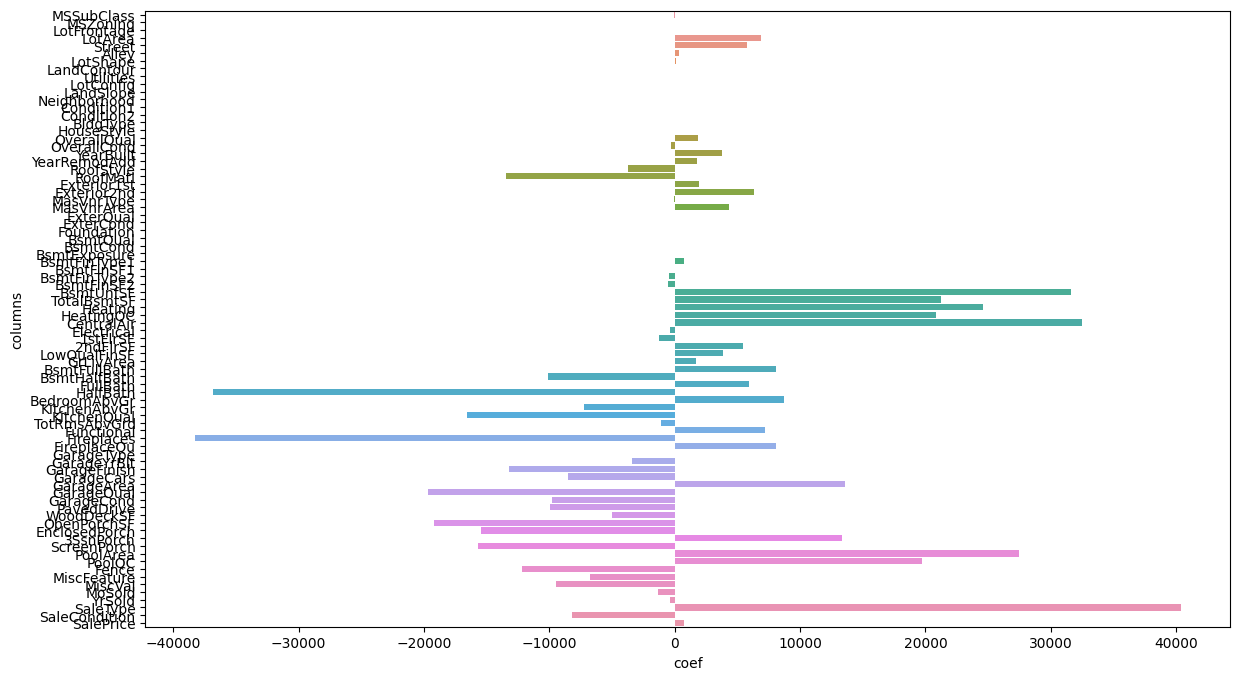

In [13]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso
%matplotlib inline
df = pd.read_csv('../content/house_prices.csv.gz', index_col='Id')


lasso = Lasso()
lasso.fit(x, y)

for coef, col in sorted(zip(lasso.coef_, df.columns), key=lambda x: np.abs(x[0])):
    print("{} \t {}".format(np.round(coef, 4), col))

plt.figure(figsize=(14,8))
sns.barplot(y='columns', x='coef',data=pd.DataFrame(list(zip(lasso.coef_, df.columns)), columns=["coef", "columns"]))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.176e+11, tolerance: 9.208e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.096e+10, tolerance: 9.208e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.135e+11, tolerance: 9.208e

Text(0.5, 1.0, 'Ridge')

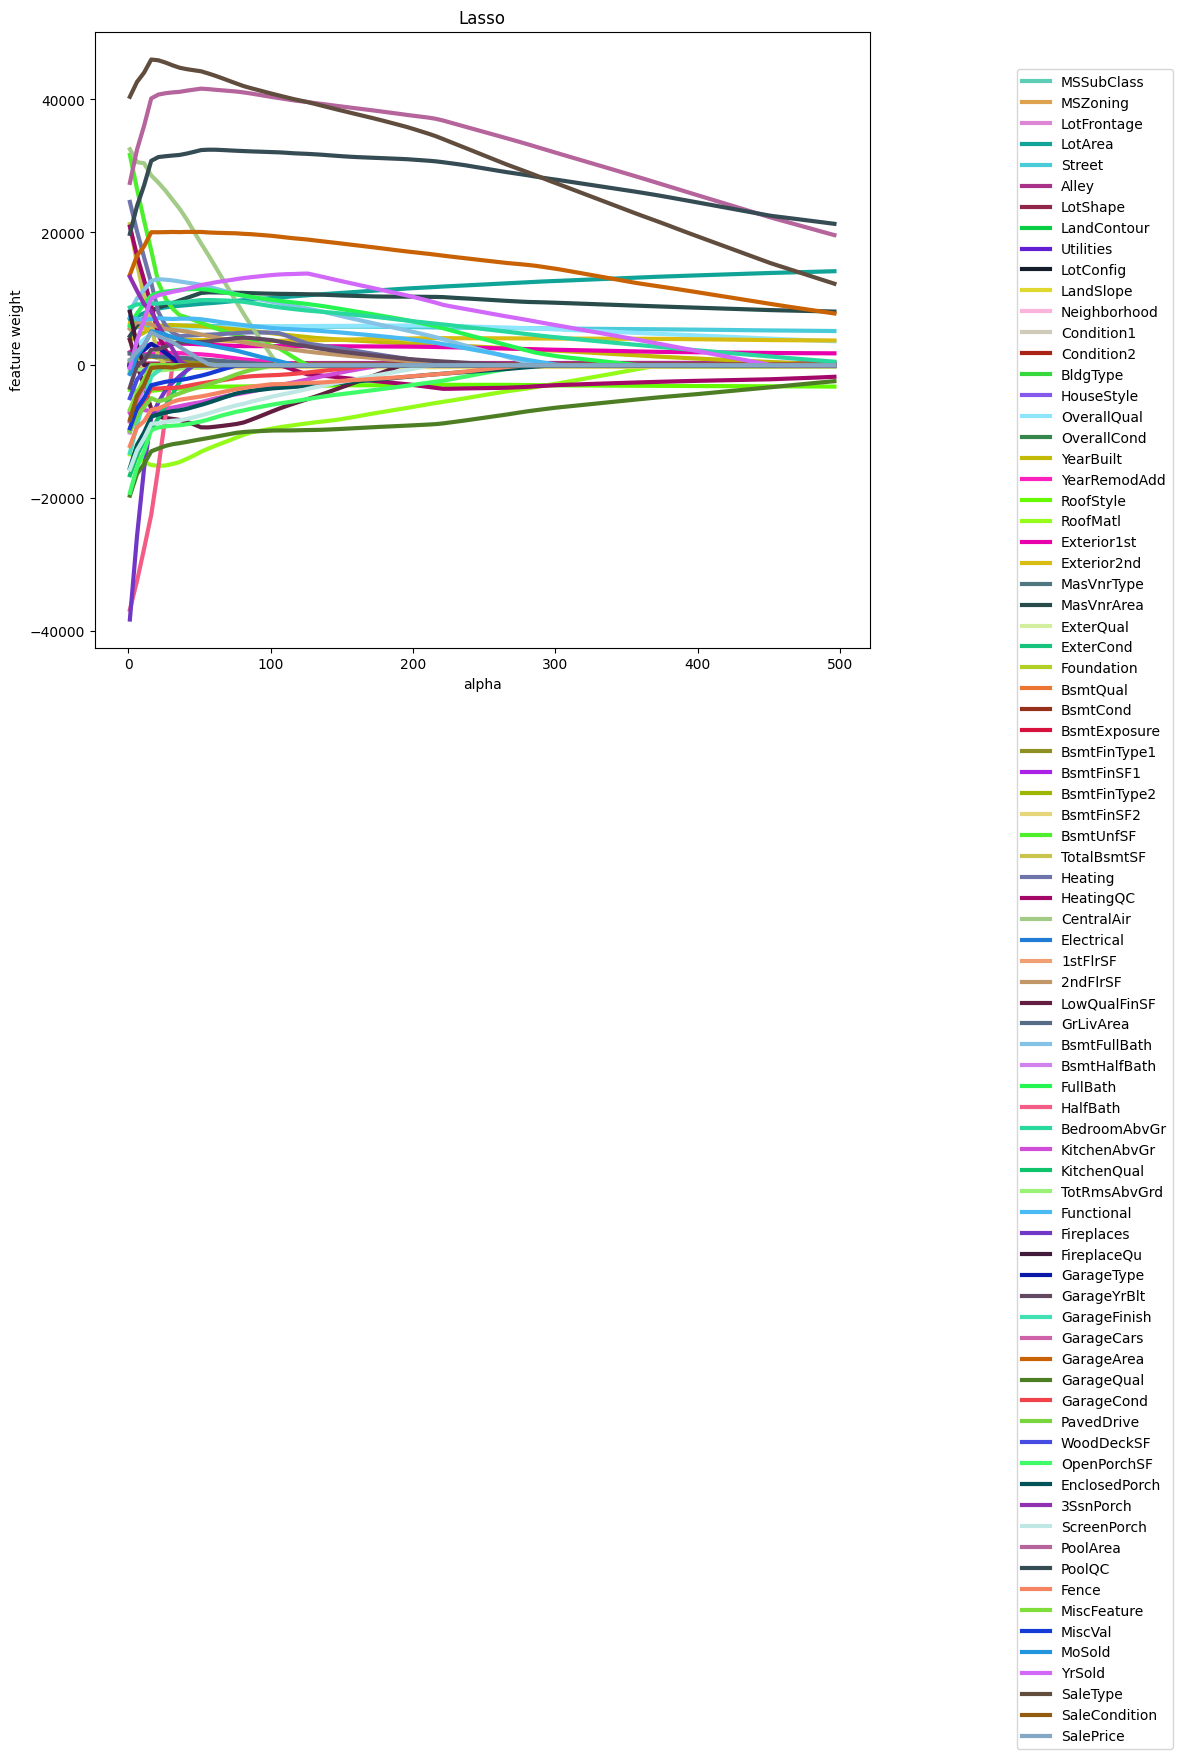

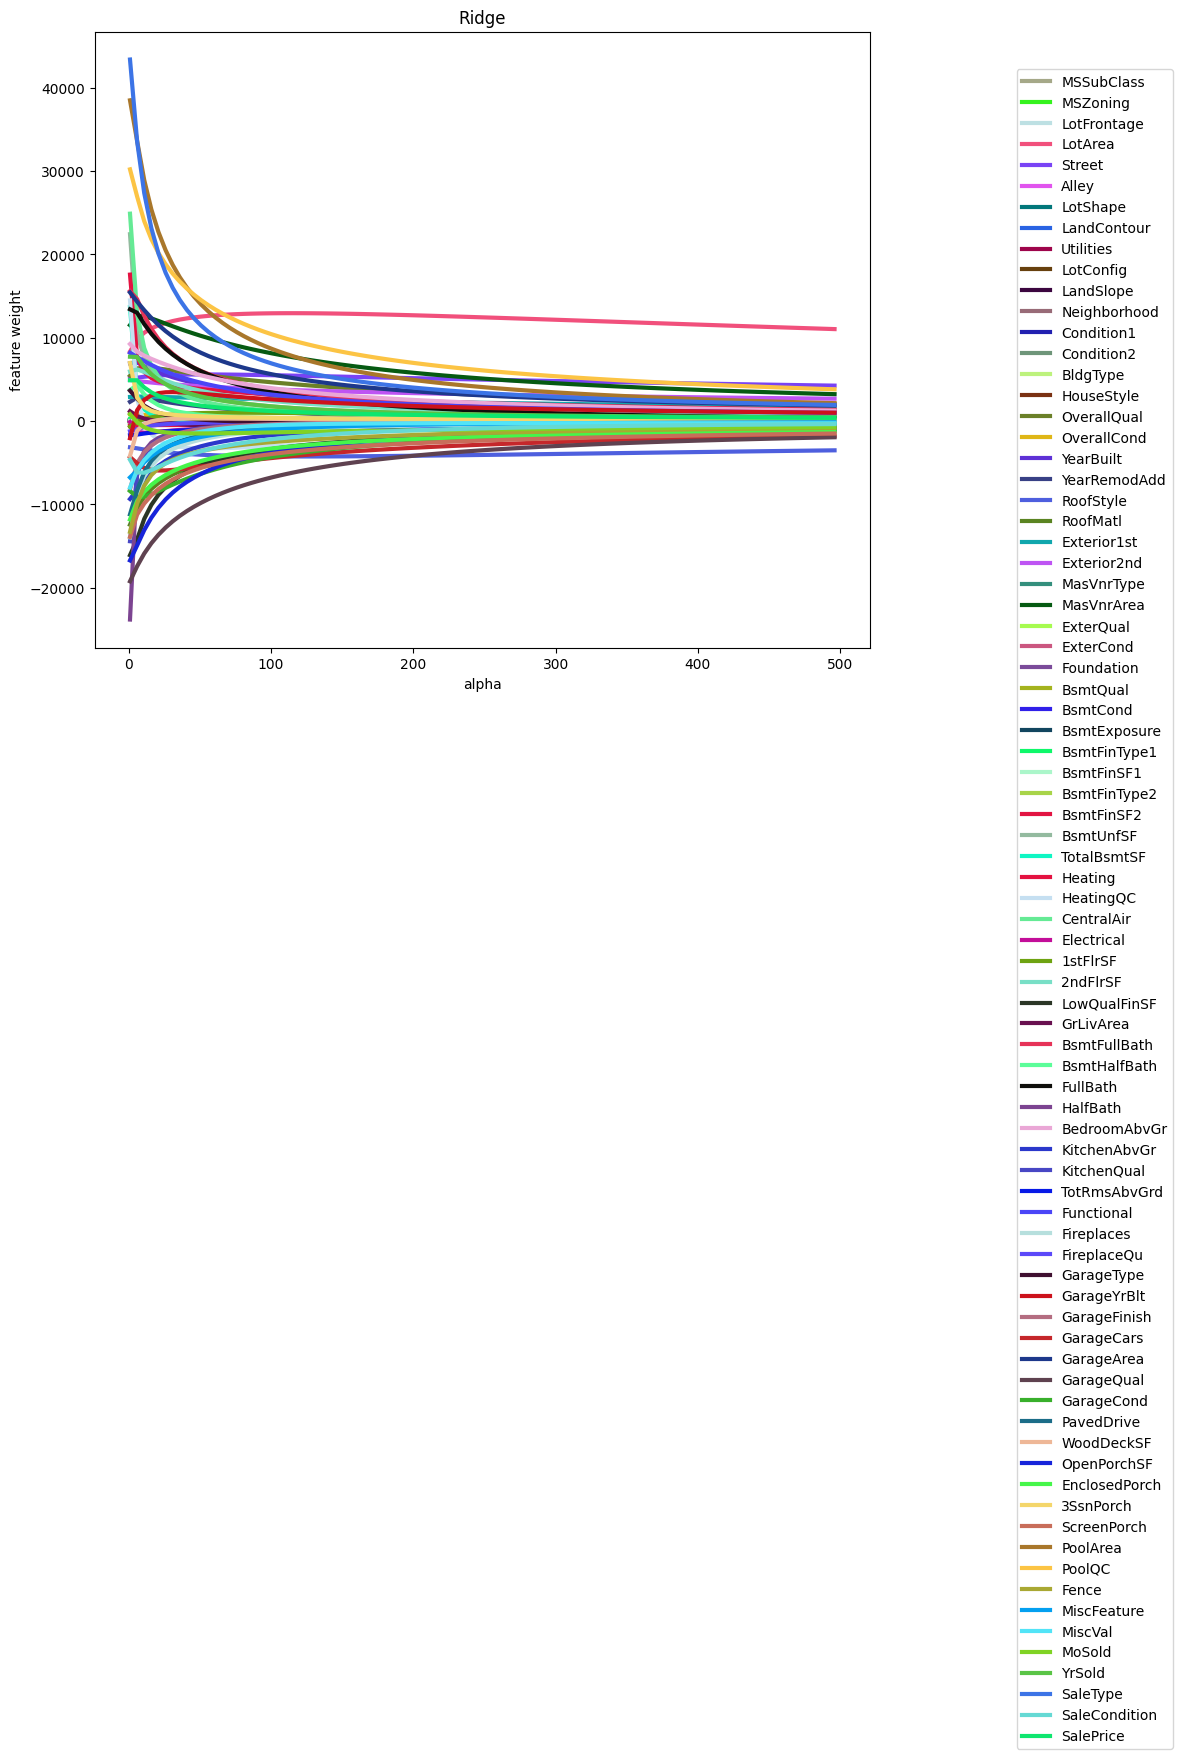

In [27]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso
%matplotlib inline
df = pd.read_csv('../content/house_prices.csv.gz', index_col='Id')

alphas = np.arange(1, 500, 5)
coefs_lasso = np.zeros(( np.array(alphas).shape[0], np.array(x).shape[1]))
coefs_ridge = np.zeros(( np.array(alphas).shape[0], np.array(x).shape[1]))

i = 0
for alpha in alphas:
    lasso = Lasso(alpha = alpha, random_state=42)
    lasso.fit(x, y)
    coefs_lasso[i, :] = lasso.coef_

    ridge = Ridge(alpha = alpha, random_state=42)
    ridge.fit(x, y)
    coefs_ridge[i, :] = ridge.coef_

    i += 1

plt.figure(figsize=(10, 8))
for coef, feature in zip(coefs_lasso.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3), linewidth=3)
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Lasso")

plt.figure(figsize=(10, 8))
for coef, feature in zip(coefs_ridge.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3), linewidth=3)
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Ridge")

## 1.7 Поиск оптимального alpha (6 баллов)

- С помощью метода LassoCV найдите оптимальное значение alpha и напечатайте его, используя разбиение на 5 фолда в кроссвалидации (`cv=5`).
- Нарисуйте график зависимости MSE от alpha (`mse_path_`).
- Нарисуйте длинную гистограмму магнитуда признаков, как в классе, на которой будет показано значение коэффициента для каждого признака. Графк должен быть остортирован по величине коэффициентов. Признаки с нулевыми коэффициентами должны быть удалены.
- Сколько в итоге ненулевых признаков осталось?
- Выведите **среднее** ошибки предсказания на 5 фолдах (cv=5) для этой линейной регрессии с помощью функции [sklearn.model_selection.cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html). Укажите `scoring='neg_mean_squared_error'`, чтобы считалась [MSE](http://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error). Качество должно быть лучше, чем у простой линейной регрессии.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


alpha = 209067.77468299225


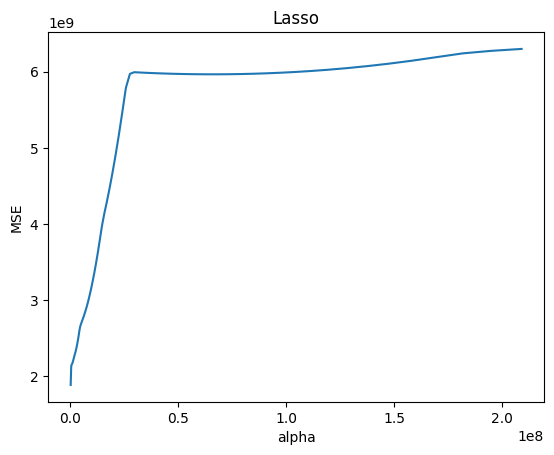

In [61]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv('../content/house_prices.csv.gz', index_col='Id')

from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(random_state=42)
lasso_cv.fit(x, y)

mean_mse = np.mean(lasso_cv.mse_path_, axis = 1)

plt.plot(lasso_cv.alphas_, mean_mse)
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.title('Lasso')
print('alpha = {}'.format(lasso_cv.alpha_))

In [32]:
coef = pd.DataFrame(list(zip(np.round(lasso_cv.coef_, 2), df.columns)))
coef.columns = ['weight', 'feature']
coef.sort_values(['weight'], ascending=False)

,weight,feature
77,44254.23,SaleType
70,41580.15,PoolArea
71,32313.56,PoolQC
61,20040.69,GarageArea
40,18673.30,CentralAir
...,...,...
69,-7628.15,ScreenPorch
66,-8516.36,OpenPorchSF
44,-9269.73,LowQualFinSF
62,-11193.22,GarageQual


In [34]:
print(cross_val_score(lasso_cv, x, y, cv=5, scoring='neg_mean_squared_error'))

Выходные данные были обрезаны до нескольких последних строк (5000).
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13620711861.512634, tolerance: 617727696.5321581
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13772276511.532135, tolerance: 617727696.5321581
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19680265202.696594, tolerance: 617727696.5321581
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-p

[-5.91769395e+08 -1.06080052e+09 -1.18223749e+09 -5.95155061e+08
 -2.00795137e+09]


In [46]:
print(coef.notnull().sum().sum())

160


## 1.8 Предсказание на отложенной выборке (3 балла)

- Используя [sklearn.model_selection.train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) разбейте датасет на 2 части - тренировочную и тестовую в соотношении 0.33. Не забудьте перемешать!
- Напечатайте размерность X_train и X_test

In [48]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv('../content/house_prices.csv.gz', index_col='Id')

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

print("Размерность тренировочной X: ",len(X_train),'\n')
print("Размерность тестовой X: ",len(X_test))

Размерность тренировочной X:  978 

Размерность тестовой X:  482


Теперь, возьмите вашу самую мощную модель(не тренированную!). Запустите её тренировку по тренировочной выборке X_train, y_train с помощью функции `fit`. Постройте предсказания с помощью функции `predict`.

In [49]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv('../content/house_prices.csv.gz', index_col='Id')

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

Визуализируйте scatter plot предсказанных значений и настоящих (`y_test`). У вас должен получиться график, точки которого расположены приблизительно вдоль некоторой прямой с разбросом. Идеальный предсказатель будет выглядить как набор точек вдоль прямой без разброса.

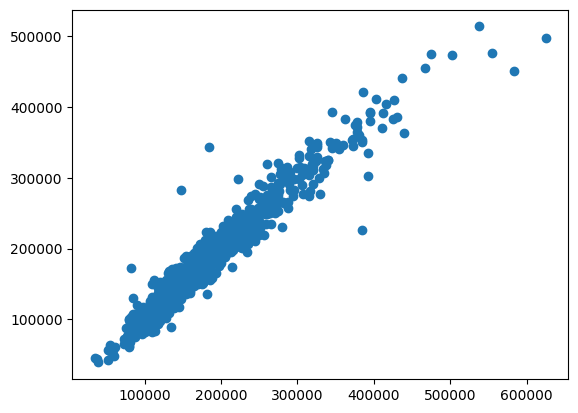

In [50]:
plt.scatter(y_train, y_lr_train_pred)

## 1.9 Ограниченная версия ( 4 балла)

Помните в самом начале мы оставили очень мало признаков по данным из heatmap. Настало время проверить как он себя покажет! К счастью они все сразу числовые, а не категориальные. Переиспользуйте тот дадасет, где вы уже поборолись с пропусками.
Снова выделите отдельно X и y и запустите кроссвалидацию c 5 фолдами по Lasso с `alpha=1`.

In [52]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, kurtosis

%matplotlib inline

df = pd.read_csv('../content/house_prices.csv.gz', index_col='Id')

obj_columns = df.select_dtypes(include=['object']).columns
df[obj_columns] = df[obj_columns].fillna('unknown')

flt_columns = df.select_dtypes(include=['float']).columns
df[flt_columns] = df[flt_columns].fillna(df[flt_columns].mean())

df = pd.get_dummies(df, columns= df.select_dtypes(include=['object']).columns, drop_first= True )
df_vec = df.values.tolist()

In [53]:
y = df.loc[:, df.columns == 'SalePrice']
x = df.loc[:, df.columns != 'SalePrice']

In [69]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(random_state=42)
lasso_cv.fit(x, y)

mean_mse = np.mean(lasso_cv.mse_path_, axis = 1)

print('alpha = {}'.format(lasso_cv.alpha_))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


alpha = 209067.77468299225


In [72]:
model = LassoCV(n_alphas= 209068, cv=5)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

model.fit(X_train, y_train)
y_lr_train_pred = model.predict(X_train)
y_lr_test_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Можете посмотреть еще много разных примеров обработки этого датасета тут: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/kernels

А суть всего этого такова, что в итоге надо кучу времени потратить на подготовку признаков. Смотреть на кучу графиков а потом стакать модели.